# Latar Belakang
xyz.com adalah perusahan rintisan B2B yang menjual berbagai produk tidak langsung kepada end user tetapi ke bisnis/perusahaan lainnya. Sebagai data-driven company, maka setiap pengambilan keputusan di xyz.com selalu berdasarkan data. Setiap quarter xyz.com akan mengadakan townhall dimana seluruh atau perwakilan divisi akan berkumpul untuk me-review performance perusahaan selama quarter terakhir.

 

# Tugas dan Langkah
Sebagai seorang data analyst, kamu dimintai untuk menyediakan data dan analisa mengenai kondisi perusahaan bulan terakhir untuk dipresentasikan di townhall tersebut. (Asumsikan tahun yang sedang berjalan adalah tahun 2004).

Adapun hal yang akan direview adalah :

- Bagaimana pertumbuhan penjualan saat ini?
- Apakah jumlah customers xyz.com semakin bertambah ?
- Dan seberapa banyak customers tersebut yang sudah melakukan transaksi?
- Category produk apa saja yang paling banyak dibeli oleh customers?
- Seberapa banyak customers yang tetap aktif bertransaksi?

Langkah yang akan dilakukan :

- Menggunakan klausa “Select … From …” untuk mengambil data di database
- Menggunakan klausa Where dan Operator untuk menfilter data
- Menggunakan “group by”dan fungsi aggregat untuk aggregasi penjualan dan revenue
- Menggunakan “order by” untuk mengurutkan data
- Menggunakan “union” untuk menggabungkan tabel data penjualan
- Menggunakan “date and time function” dan fungsi text untuk data manipulation
- Menggunakan subquery untuk menyimpan hasil sementara untuk digunakan kembali dalam query.

# Tabel yang Digunakan
Tabel yang akan digunakan pada project kali ini adalah sebagai berikut.

- Tabel orders_1 : Berisi data terkait transaksi penjualan periode quarter 1 (Jan – Mar 2004)
- Tabel Orders_2 : Berisi data terkait transaksi penjualan periode quarter 2 (Apr – Jun 2004)
- Tabel Customer : Berisi data profil customer yang mendaftar menjadi customer xyz.com

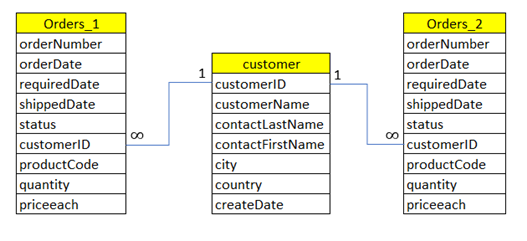

# Memahami table
Sebelum membuat memulai menyusun query SQL dan membuat Analisa dari hasil query, hal yang perlu dilakukan adalah pertama-tama menjadi familiar dengan tabel yang akan digunakan. Hal ini akan sangat berguna dalam menentukan kolom mana sekiranya berkaitan dengan problem yang akan dianalisa, dan proses manipulasi data apa yang sekiranya perlu dilakukan untuk kolom – kolom tersebut, karena tidak semua kolom pada tabel perlu untuk digunakan.

- Mengecek tabel orders_1 :
    ```SELECT * FROM orders_1 limit 5;```
- Mengecek tabel orders_2 :
    ```SELECT * FROM orders_2 limit 5;```
- Mengecek tabel customer :
    ```SELECT * FROM customer limit 5;```

Lakukan pengecekan data di query editor dan jika berhasil hasil sebagai berikut:

```
+-------------+------------+--------------+-------------+---------+------------+-------------+----------+-----------+
| orderNumber | orderDate  | requiredDate | shippedDate | status  | customerID | productCode | quantity | priceeach |
+-------------+------------+--------------+-------------+---------+------------+-------------+----------+-----------+
|       10234 | 2004-03-30 | 2004-04-05   | 2004-04-02  | Shipped |        412 | S72_1253    |       40 |     45690 |
|       10234 | 2004-03-30 | 2004-04-05   | 2004-04-02  | Shipped |        412 | S700_2047   |       29 |     83280 |
|       10234 | 2004-03-30 | 2004-04-05   | 2004-04-02  | Shipped |        412 | S24_3816    |       31 |     78830 |
|       10234 | 2004-03-30 | 2004-04-05   | 2004-04-02  | Shipped |        412 | S24_3420    |       25 |     65090 |
|       10234 | 2004-03-30 | 2004-04-05   | 2004-04-02  | Shipped |        412 | S24_2841    |       44 |     67140 |
+-------------+------------+--------------+-------------+---------+------------+-------------+----------+-----------+
+-------------+------------+--------------+-------------+---------+------------+-------------+----------+-----------+
| orderNumber | orderDate  | requiredDate | shippedDate | status  | customerID | productCode | quantity | priceeach |
+-------------+------------+--------------+-------------+---------+------------+-------------+----------+-----------+
|       10235 | 2004-04-02 | 2004-04-12   | 2004-04-06  | Shipped |        260 | S18_2581    |       24 |     81950 |
|       10235 | 2004-04-02 | 2004-04-12   | 2004-04-06  | Shipped |        260 | S24_1785    |       23 |     89720 |
|       10235 | 2004-04-02 | 2004-04-12   | 2004-04-06  | Shipped |        260 | S24_3949    |       33 |     55270 |
|       10235 | 2004-04-02 | 2004-04-12   | 2004-04-06  | Shipped |        260 | S24_4278    |       40 |     63030 |
|       10235 | 2004-04-02 | 2004-04-12   | 2004-04-06  | Shipped |        260 | S32_1374    |       41 |     90900 |
+-------------+------------+--------------+-------------+---------+------------+-------------+----------+-----------+
+------------+----------------------------+-----------------+------------------+-----------+-----------+------------+
| customerID | customerName               | contactLastName | contactFirstName | city      | country   | createDate |
+------------+----------------------------+-----------------+------------------+-----------+-----------+------------+
|        103 | Atelier graphique          | Schmitt         | Carine           | Nantes    | France    | 2004-02-05 |
|        112 | Signal Gift Stores         | King            | Jean             | Las Vegas | USA       | 2004-02-05 |
|        114 | Australian Collectors, Co. | Ferguson        | Peter            | Melbourne | Australia | 2004-02-20 |
|        119 | La Rochelle Gifts          | Labrune         | Janine           | Nantes    | France    | 2004-02-05 |
|        121 | Baane Mini Imports         | Bergulfsen      | Jonas            | Stavern   | Norway    | 2004-02-05 |
+------------+----------------------------+-----------------+------------------+-----------+-----------+------------+
```

# Total Penjualan dan Revenue pada Quarter-1 (Jan, Feb, Mar) dan Quarter-2 (Apr,Mei,Jun)
Dari tabel orders_1 lakukan penjumlahan pada kolom quantity dengan fungsi aggregate sum() dan beri nama “total_penjualan”, kalikan kolom quantity dengan kolom priceEach kemudian jumlahkan hasil perkalian kedua kolom tersebut dan beri nama “revenue”
Perusahaan hanya ingin menghitung penjualan dari produk yang terkirim saja, jadi kita perlu mem-filter kolom ‘status’ sehingga hanya menampilkan order dengan status “Shipped”.
Lakukan Langkah 1 & 2, untuk tabel orders_2.
Notes: Jangan lupa untuk mengakhiri setiap statement dengan titik koma sehingga kedua statement dapat dijalankan bersamaan.(;)

SQL Code:

```
SELECT SUM(quantity) as 'total_penjualan', SUM(quantity*priceEach) as revenue FROM orders_1
WHERE status = 'Shipped'
GROUP BY status;

SELECT SUM(quantity)as 'total_penjualan', SUM(quantity*priceEach)as revenue FROM orders_2
WHERE status = 'Shipped'
GROUP BY status;

```

Hasilnya sebagai berikut :
```
+-----------------+-----------+
| total_penjualan | revenue   |
+-----------------+-----------+
|            8694 | 799579310 |
+-----------------+-----------+
+-----------------+-----------+
| total_penjualan | revenue   |
+-----------------+-----------+
|            6717 | 607548320 |
+-----------------+-----------+
```

# Menghitung persentasi keseluruhan penjualan
Kedua tabel orders_1 dan orders_2 masih terpisah, untuk menghitung persentasi keseluruhan penjualan dari kedua tabel tersebut perlu digabungkan :

Pilihlah kolom “orderNumber”, “status”, “quantity”, “priceEach” pada tabel orders_1, dan tambahkan kolom baru dengan nama “quarter” dan isi dengan value “1”. Lakukan yang sama dengan tabel orders_2, dan isi dengan value “2”, kemudian gabungkan kedua tabel tersebut.
Gunakan statement dari Langkah 1 sebagai subquery dan beri alias “tabel_a”.
Dari “tabel_a”, lakukan penjumlahan pada kolom “quantity” dengan fungsi aggregate sum() dan beri nama “total_penjualan”, dan kalikan kolom quantity dengan kolom priceEach kemudian jumlahkan hasil perkalian kedua kolom tersebut dan beri nama “revenue”
Filter kolom ‘status’ sehingga hanya menampilkan order dengan status “Shipped”.
Kelompokkan total_penjualan berdasarkan kolom “quarter”, dan jangan lupa menambahkan kolom ini pada bagian select.


SQL Code:
```
SELECT '1' as 'quarter', SUM(quantity) as total_penjualan, SUM(quantity*priceEach) as revenue FROM orders_1
UNION ALL
SELECT '2'as 'quarter', SUM(quantity)as total_penjualan,SUM(quantity*priceEach) FROM orders_2
WHERE status = 'Shipped';
```

Hasil kolom sebagai berikut :

```
+---------+-----------------+-----------+
| quarter | total_penjualan | revenue   |
+---------+-----------------+-----------+
| 1       |            8694 | 799579310 |
| 2       |            6717 | 607548320 |
+---------+-----------------+-----------+
```

# Perhitungan Growth Penjualan dan Revenue
Untuk project ini, perhitungan pertumbuhan penjualan akan dilakukan secara manual menggunakan formula yang disediakan diatas. Adapun perhitungan pertumbuhan penjualan dengan SQL dapat dilakukan menggunakan “window function” yang akan dibahas di materi DQLab berikutnya.

 

%Growth Penjualan = (6717 – 8694)/8694 = -22%

%Growth Revenue = (607548320 – 799579310)/ 799579310 = -24%

# Apakah jumlah customers xyz.com semakin bertambah?
Penambahan jumlah customers dapat diukur dengan membandingkan total jumlah customers yang registrasi di periode saat ini dengan total jumlah customers yang registrasi diakhir periode sebelumnya.

Dari tabel customer, pilihlah kolom customerID, createDate dan tambahkan kolom baru dengan menggunakan fungsi QUARTER(…) untuk mengekstrak nilai quarter dari CreateDate dan beri nama “quarter”
Filter kolom “createDate” sehingga hanya menampilkan baris dengan createDate antara 1 Januari 2004 dan 30Juni 2004
Gunakan statement Langkah 1 & 2 sebagai subquery dengan alias tabel_b
Hitunglah jumlah unik customers à tidak ada duplikasi customers dan beri nama “total_customers”
Kelompokkan total_customer berdasarkan kolom “quarter”, dan jangan lupa menambahkan kolom ini pada bagian select.

SQL Code:
```
SELECT quarter,COUNT(customerID) as total_customers 

FROM 

(SELECT customerID, QUARTER(createDate)as quarter FROM customer
WHERE createDate >= '1 Januari 2004' and createDate < '30Juni 2004')

as tabel_b
GROUP BY quarter;
```


Output:
```
+---------+-----------------+
| quarter | total_customers |
+---------+-----------------+
|       1 |              43 |
|       2 |              35 |
+---------+-----------------+
```

# Seberapa banyak customers tersebut yang sudah melakukan transaksi?
Problem ini merupakan kelanjutan dari problem sebelumnya yaitu dari sejumlah customer yang registrasi di periode quarter-1 dan quarter-2, berapa banyak yang sudah melakukan transaksi

Dari tabel customer, pilihlah kolom customerID, createDate dan tambahkan kolom baru dengan menggunakan fungsi QUARTER(…) untuk mengekstrak nilai quarter dari CreateDate dan beri nama “quarter”
Filter kolom “createDate” sehingga hanya menampilkan baris dengan createDate antara 1 Januari 2004 dan 30 Juni 2004
Gunakan statement Langkah A&B sebagai subquery dengan alias tabel_b
Dari tabel orders_1 dan orders_2, pilihlah kolom customerID, gunakan DISTINCT untuk menghilangkan duplikasi, kemudian gabungkan dengan kedua tabel tersebut dengan UNION.
Filter tabel_b menggunakan operator IN() dan ‘Select statement Langkah d’, sehingga hanya customerID yang pernah bertransaksi (customerID tercatat di tabel orders) yang diperhitungkan.
Hitunglah jumlah unik customers (tidak ada duplikasi customers) di statement SELECT dan beri nama “total_customers”
Kelompokkan total_customer berdasarkan kolom “quarter”, dan jangan lupa menambahkan kolom ini pada bagian select.

SQL Code:
```
SELECT quarter,COUNT(customerID) as total_customers FROM (SELECT customerID, QUARTER(createDate)as quarter FROM customer
WHERE createDate >= '1 Januari 2004' and createDate < '30Juni 2004')as tabel_b
WHERE customerID IN(SELECT DISTINCT customerID FROM orders_1
UNION ALL
SELECT DISTINCT customerID FROM orders_2)
GROUP BY quarter;
```

Output:
```
+---------+-----------------+
| quarter | total_customers |
+---------+-----------------+
|       1 |              25 |
|       2 |              19 |
+---------+-----------------+
```

Category produk apa saja yang paling banyak di-order oleh customers di Quarter-2?
Untuk mengetahui kategori produk yang paling banyak dibeli, maka dapat dilakukan dengan menghitung total order dan jumlah penjualan dari setiap kategori produk.

Dari kolom orders_2, pilih productCode, orderNumber, quantity, status
Tambahkan kolom baru dengan mengekstrak 3 karakter awal dari productCode yang merupakan ID untuk kategori produk; dan beri nama categoryID
Filter kolom “status” sehingga hanya produk dengan status “Shipped” yang diperhitungkan
Gunakan statement Langkah 1, 2, dan 3 sebagai subquery dengan alias tabel_c
Hitunglah total order dari kolom “orderNumber” dan beri nama “total_order”, dan jumlah penjualan dari kolom “quantity” dan beri nama “total_penjualan”
Kelompokkan berdasarkan categoryID, dan jangan lupa menambahkan kolom ini pada bagian select.
Urutkan berdasarkan “total_order” dari terbesar ke terkecil



SQL Code
```
SELECT categoryid,total_order,total_penjualan FROM (SELECT categoryid, COUNT(DISTINCT orderNumber) as total_order, SUM(quantity) as total_penjualan FROM (SELECT LEFT(productCode,3) as categoryid, productCode,orderNumber,quantity,status FROM orders_2
WHERE status = 'Shipped') as tabel_c 
GROUP BY categoryid) as tabel_c
ORDER BY total_order DESC;

```
Hasilnya sebagai berikut :
```
+------------+-------------+-----------------+
| categoryid | total_order | total_penjualan |
+------------+-------------+-----------------+
| S18        |          25 |            2264 |
| S24        |          21 |            1826 |
| S32        |          11 |             616 |
| S12        |          10 |             491 |
| S10        |           8 |             492 |
| S50        |           8 |             292 |
| S70        |           7 |             675 |
| S72        |           2 |              61 |
+------------+-------------+-----------------+
```

# Seberapa banyak customers yang tetap aktif bertransaksi setelah transaksi pertamanya?
Mengetahui seberapa banyak customers yang tetap aktif menunjukkan apakah xyz.com tetap digemari oleh customers untuk memesan kebutuhan bisnis mereka. Hal ini juga dapat menjadi dasar bagi tim product dan business untuk pengembangan product dan business kedepannya. Adapun metrik yang digunakan disebut retention cohort. Untuk project ini, kita akan menghitung retention dengan query SQL sederhana, sedangkan cara lain yaitu JOIN dan SELF JOIN akan dibahas dimateri selanjutnya :

 

Oleh karena baru terdapat 2 periode yang Quarter 1 dan Quarter 2, maka retention yang dapat dihitung adalah retention dari customers yang berbelanja di Quarter 1 dan kembali berbelanja di Quarter 2, sedangkan untuk customers yang berbelanja di Quarter 2 baru bisa dihitung retentionnya di Quarter 3.

Dari tabel orders_1, tambahkan kolom baru dengan value “1” dan beri nama “quarter”
Dari tabel orders_2, pilihlah kolom customerID, gunakan distinct untuk menghilangkan duplikasi
Filter orders_1 menggunakan operator IN() dan ‘Select statement Langkah 2)’, sehingga hanya customerID yang pernah bertransaksi di quarter 2 (customerID tercatat di tabel orders_2) yang diperhitungkan.
Hitunglah jumlah unik customers (tidak ada duplikasi customers) dibagi dengan total_ customers dalam percentage, pada Select statement dan beri nama “Q2”

SQL Code:
```
#Menghitung total unik customers yang transaksi di quarter_1

SELECT COUNT(DISTINCT customerID) as total_customers FROM orders_1;

#output = 25

SELECT '1' AS quarter, (COUNT(DISTINCT customerID)*100)/25 q2 FROM orders_1
WHERE customerID IN(SELECT DISTINCT customerID as total_customers FROM orders_2);
```

Output:
```
+-----------------+
| total_customers |
+-----------------+
|              25 |
+-----------------+
+---------+---------+
| quarter | q2      |
+---------+---------+
| 1       | 24.0000 |
+---------+---------+
```

# Kesimpulan
Berdasarkan data yang telah kita peroleh melalui query SQL, Kita dapat menarik kesimpulan bahwa :

1. Performance xyz.com menurun signifikan di quarter ke-2, terlihat dari nilai penjualan dan revenue yang drop hingga 20% dan 24%,

2. perolehan customer baru juga tidak terlalu baik, dan sedikit menurun dibandingkan quarter sebelumnya.

3. Ketertarikan customer baru untuk berbelanja di xyz.com masih kurang, hanya sekitar 56% saja yang sudah bertransaksi. Disarankan tim Produk untuk perlu mempelajari behaviour customer dan melakukan product improvement, sehingga conversion rate (register to transaction) dapat meningkat.

4. Produk kategori S18 dan S24 berkontribusi sekitar 50% dari total order dan 60% dari total penjualan, sehingga xyz.com sebaiknya fokus untuk pengembangan category S18 dan S24.

5. Retention rate customer xyz.com juga sangat rendah yaitu hanya 24%, artinya banyak customer yang sudah bertransaksi di quarter-1 tidak kembali melakukan order di quarter ke-2 (no repeat order).com mengalami pertumbuhan negatif di quarter ke-2 dan perlu melakukan banyak improvement baik itu di sisi produk dan bisnis marketing, jika ingin mencapai target dan positif growth di quarter ke-3. 

6. Rendahnya retention rate dan conversion rate bisa menjadi diagnosa awal bahwa customer tidak tertarik/kurang puas/kecewa berbelanja di xyz.com.
